<div align="center" style=" font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/Python-Notebook-Banners/Exercise.png"  style="display: block; margin-left: auto; margin-right: auto;";/>
</div>

# Exercise: Multiple linear regression
© ExploreAI Academy

In this exercise, we will reinforce our knowledge of the fundamental concepts of multiple linear regression by implementing  an MLR model and assessing its accuracy. 

## Learning objectives

By the end of this train, you should be able to:
* Implement multiple linear regression in Python.
* Assess model accuracy by interpreting outputs.
* Understand what is meant by linearity and multicollinearity of predictors.
* Understand what is meant by independence, homoscedasticity, and normality of residuals and how we can check these in our model output.


## The dataset

For this exercise, we make use of the `enviro_indicators` dataset. The dataset comprises socio-economic and environmental data collected from various countries, focusing on factors related to sustainable development. It includes information such as forest coverage, biodiversity index, protected areas, rural population, and deforestation rates, aimed at understanding the relationship between human activities and land degradation.

The following are the descriptions of the columns in our dataset: 

* `country`: Name of the country.
* `forest_coverage`: Percentage of land covered by forests. This indicator represents the extent of forested areas within the total land area of each country.
* `biodiversity_index`: Index representing the biodiversity level in each country. This indicator provides a measure of the variety and variability of organisms within each country's ecosystem.
* `protected_areas`: Percentage of land designated as protected areas. This indicator reflects the proportion of land that is legally protected and managed for conservation purposes.
* `deforestation_rate`: Annual rate of deforestation (%). This indicator quantifies the percentage of forested land that is lost each year due to deforestation activities.
* `carbon_sequestration`: Amount of carbon sequestered by forests (metric tons per hectare). This indicator measures the capacity of forests to absorb and store carbon dioxide from the atmosphere, thus helping mitigate climate change.
* `soil_erosion`: Rate of soil erosion (tons per hectare per year). This indicator indicates the amount of soil that is lost or displaced annually due to erosion, which can have detrimental effects on land productivity and ecosystem health.
* `land_degradation`: Percentage of land classified as degraded. This indicator represents the proportion of land that has suffered a decline in its ecological condition, often resulting from unsustainable land use practices.
* `rural_population`: Percentage of population living in rural areas. This indicator reflects the proportion of a country's population residing in rural areas rather than urban centres.
* `population_density`: Population density (people per square kilometre). This indicator quantifies the average number of people living within a unit area of land, providing insights into the distribution of human populations across different countries.


We begin by importing some libraries which will help us load and explore our data. 

In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import statsmodels.graphics.correlation as sgc
from statsmodels.graphics.gofplots import qqplot
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import OLSInfluence

In [2]:
# Read the data
environmental_indicators = pd.read_csv('https://raw.githubusercontent.com/Explore-AI/Public-Data/master/Data/regression_sprint/enviro_indicators.csv', index_col=0)
environmental_indicators.head(10)

,forest_coverage,biodiversity_index,protected_areas,deforestation_rate,carbon_sequestration,soil_erosion,land_degradation,rural_population,population_density
Country,,,,,,,,,
Vietnam,36.217808,6.505159,14.832708,36.583106,53.128459,7.987880,55.020903,35.912142,468.715839
Guinea-Bissau,76.550001,94.888554,23.994363,123.384939,279.836286,13.013811,41.655073,34.639379,351.054600
Bosnia and Herzegovina,61.239576,96.563203,9.932348,115.743745,237.834951,13.037065,26.951490,78.380633,289.329973
Lesotho,51.906094,80.839735,33.076894,111.752369,149.948515,11.179719,27.460479,43.585863,57.616482
Indonesia,20.921305,30.461377,7.609273,46.450326,103.939415,2.715506,46.297784,73.522793,311.353541
Singapore,20.919616,9.767211,39.541043,25.249501,201.926827,16.870747,54.855513,57.868318,495.126387
Saint Lucia,14.065853,68.423303,32.028567,76.130581,474.309367,7.094821,54.354321,67.688678,78.641167
Turkmenistan,70.632330,44.015249,11.955049,73.358093,195.441319,4.543852,48.993777,50.158226,263.981530
Kenya,52.078051,12.203823,5.193274,36.843972,283.455780,1.774728,42.101582,54.614233,439.912805


## Exercises

As part of a conservation effort, we are tasked with building a predictive model to understand the factors influencing the biodiversity index across different countries. 

Use the flow of these exercises as a guide to build a **multiple linear regression model**. 

### Exercise 1

Print the first few rows of the dataset, the summary statistics, and check for missing values. Doing this provides an overview of the structure of the data and highlights whether there are any issues with missing data. 

In [3]:
# insert code here
print("First few rows of the dataset:")
print(environmental_indicators.head())

print("\nSummary statistics of the dataset:")
print(environmental_indicators.describe(include='all'))

print("\nMissing values in the dataset:")
print(environmental_indicators.isnull().sum())

print("\nData types:")
print(environmental_indicators.dtypes)

# Select numeric columns for downstream analysis (correlation, modelling, etc.)
numeric_columns = environmental_indicators.select_dtypes(include=[np.number])
print("\nNumeric columns to be used for analysis:")
print(list(numeric_columns.columns))

First few rows of the dataset:
                        forest_coverage  biodiversity_index  protected_areas  \
Country                                                                        
Vietnam                       36.217808            6.505159        14.832708   
Guinea-Bissau                 76.550001           94.888554        23.994363   
Bosnia and Herzegovina        61.239576           96.563203         9.932348   
Lesotho                       51.906094           80.839735        33.076894   
Indonesia                     20.921305           30.461377         7.609273   

                        deforestation_rate  carbon_sequestration  \
Country                                                            
Vietnam                          36.583106             53.128459   
Guinea-Bissau                   123.384939            279.836286   
Bosnia and Herzegovina          115.743745            237.834951   
Lesotho                         111.752369            149.948515   


### Exercise 2

Create a correlation matrix using the columns in the data. We do this to see whether there are potentially strong relationships between the independent variables and the dependant variable, but it can also be used to investigate potential multicollinearity between the independent variables.



Correlation matrix:
                      forest_coverage  biodiversity_index  protected_areas  \
forest_coverage              1.000000            0.274022         0.108666   
biodiversity_index           0.274022            1.000000        -0.067212   
protected_areas              0.108666           -0.067212         1.000000   
deforestation_rate           0.556136            0.922463         0.120202   
carbon_sequestration         0.053950            0.009418         0.146215   
soil_erosion                -0.109275           -0.062205         0.321587   
land_degradation             0.154287           -0.136184        -0.113558   
rural_population             0.022843            0.042478         0.172193   
population_density           0.027884           -0.135042        -0.001360   

                      deforestation_rate  carbon_sequestration  soil_erosion  \
forest_coverage                 0.556136              0.053950     -0.109275   
biodiversity_index              0.9224

<Figure size 1000x800 with 0 Axes>

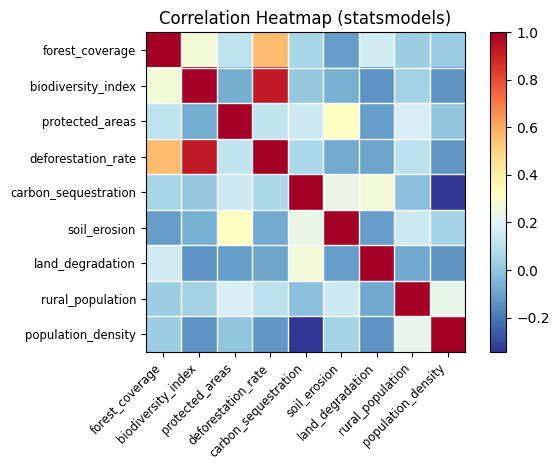

In [4]:
# insert code here
numeric_columns = environmental_indicators.select_dtypes(include=[np.number])
corr_matrix = numeric_columns.corr()

print("\nCorrelation matrix:")
print(corr_matrix)

# Plot heatmap: prefer statsmodels.plot_corr if available, otherwise use seaborn
try:
    from statsmodels.graphics.correlation import plot_corr
    plt.figure(figsize=(10, 8))
    plot_corr(corr_matrix, xnames=corr_matrix.columns)
    plt.title('Correlation Heatmap (statsmodels)')
    plt.show()
except Exception:
    import seaborn as sns
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1, square=True, linewidths=0.5)
    plt.title('Correlation Heatmap (seaborn)')
    plt.show()


Looking at the matrix result, which variables appear to be related? 

It is, however, difficult to view the data well in table format. It might be more useful to display it as a heatmap.

1) Use the `statsmodels.graphics.correlation` package to show the correlation heatmap for the variables. 
2) What relationships exist?

In [ ]:
# insert code here

### Exercise 3

Knowing what we know about the relationships between the variables, it's time to build our regression model. To get started, include all the numeric variables in the model. Remember that `biodiversity_index` is the dependent variable.

Print the summary of the fitted model.

In [ ]:
# Specifying the variables of interest
independent_cols = ['forest_coverage',  'protected_areas',
       'deforestation_rate', 'carbon_sequestration', 'soil_erosion',
       'land_degradation', 'rural_population', 'population_density']

dependent_var = 'biodiversity_index'


In [ ]:
# insert code here

### Exercise 4

The output from this model seems somewhat strange, with a comment warning of probable multicollinearity. Furthermore, some of the coefficient p-values are rather high (larger than expected). It may be worthwhile to consider which variables appear to be associated with the dependent variable, maintaining those, and possibly removing a few additional factors where there is potential for multicollinearity.

Create another version of the model with fewer independent variables and see if the warning can be silenced. 

In [ ]:
# insert code here

### Exercise 5

Evaluate the accuracy and reliability of the multiple linear regression model by conducting various diagnostic tests.

Check for linearity by visually inspecting scatter plots between each independent variable and the biodiversity index. This will help in understanding whether the relationship between the independent variables and the biodiversity index is linear.

What can we conclude from the charts? Are there any linear relationships visible? 

In [ ]:
# insert code here

### Exercise 6
Visualise the relationship between predictor variables and model residuals to assess the independence of residuals using scatter plots. Do we see any obvious dependence of residuals? How would we know?

In [ ]:
# insert code here


### Exercise 7

Check for homoscedasticity by conducting a `Breusch-Pagan` test on our model. Interpret the results to determine whether homoscedasticity could possibly be satisfied for our regression model.

In [ ]:
# insert code here

### Exercise 8
Check for the normality of residuals by creating a Q-Q plot of the normalised residuals to visually assess their normality.

In [ ]:
# insert code here

### Question 9

To ensure the accuracy of our regression model, it's crucial to check for outliers that might significantly affect the model's coefficients and predictions. Use Cook's distance to visually inspect a plot of residuals vs. fitted values by identifying potential outliers. 

Interpret the results.

In [ ]:
# insert code here

## Solutions

### Exercise 1

Print the first few rows of the dataset, summary statistics, and test for missing values. Doing this provides an overview of the structure of the data and highlights whether there are any issues with missing data. 


In [ ]:

# Print the first few rows of the dataset
print("First few rows of the dataset:")
print(environmental_indicators.head())

# Print the summary statistics of the dataset
print("\nSummary statistics of the dataset:")
print(environmental_indicators.describe())

# Check for missing values in the dataset
print("\nMissing values in the dataset:")
print(environmental_indicators.isnull().sum())

# Exclude non-numeric columns before computing the correlation matrix
numeric_columns = environmental_indicators.select_dtypes(include=[np.number])


### Exercise 2

Create a correlation matrix using the columns in the data. We do this to see whether there are potentially strong relationships between the independent variables and the dependant variable, but it can also be used to investigate potential multicollinearity between the independent variables.


In [ ]:
# Create the correlation_matrix
correlation_matrix = numeric_columns.corr()

print("\nCorrelation matrix of the variables:")
correlation_matrix

Looking at the matrix result, which variables appear to be related? 

It is, however, difficult to view the data well in table format. It might be more useful to display it as a heatmap.

1) Use the `statsmodels.graphics.correlation` package to show the correlation heatmap for the variables. 
2) What relationships exist?

In [ ]:
# Exclude non-numeric columns (like 'country') and the dependent variable from the correlation matrix
numeric_dependent_variables = environmental_indicators
# Compute the correlation matrix
corr_matrix = numeric_dependent_variables.corr()

# Generate the correlation heatmap
plt.figure(figsize=(10, 8))
sgc.plot_corr(corr_matrix, xnames=corr_matrix.columns)
plt.title('Correlation Heatmap of Variables')
plt.show()

Based on the heatmap, we can see that there is some form of correlation between the following variables:
1) `deforestation_rate` and `forest_coverage`
2) `soil_erosion` and `protected_areas`
3) `soil_erosion` and `carbon_sequestration`
4) `land_degradation` and `carbon_sequestration`
5) `deforestation_rate` and `biodiversity_index`
6) `biodiversity_index` and `forest_coverage`

Realistically, we can see that `forest_coverage` is related to `deforestation_rate` in some way, as there needs to be a forest before it can be deforested. `deforestation_rate` also has a relatively strong relationship with `biodiversity_index`.  

### Exercise 3

Knowing what we know about the relationships between the variables, it's time to build our regression model. To get started, include all the numeric variables in the model. Remember that `biodiversity_index` is the dependent variable.

Print the summary of the fitted model.

In [ ]:
independent_cols = ['forest_coverage',  'protected_areas',
       'deforestation_rate', 'carbon_sequestration', 'soil_erosion',
       'land_degradation', 'rural_population', 'population_density']

dependent_var = 'biodiversity_index'

In [ ]:
# Generating the regression string
formula_str = dependent_var+ ' ~ ' + ' + '.join(independent_cols)
formula_str
# Construct and fit the model
model = smf.ols(formula=formula_str, data=environmental_indicators)
fitted = model.fit()

# Print the summary of the fitted model
print(fitted.summary())

The output from this model seems somewhat strange, as there is a note warning of potential multicollinearity. In addition, some of the p-values on the coefficients are quite high (larger than we would like). It might be worth looking at which variables seem to be correlated with the dependent variable, keeping those, and maybe dropping a few other variables where there might be multicollinearity. The issue with this is that our model might be highly unstable. 

### Exercise 4
Create another version of the model with fewer independent variables and see if the warning can be silenced. 

In [ ]:
# dropped population density, land_degradation, carbon sequestration
independent_cols_reduced = ['forest_coverage',  'protected_areas',
       'deforestation_rate', 'soil_erosion',
        'rural_population']

dependent_var = 'biodiversity_index'

In [ ]:
# Generating the regression string
formula_str = dependent_var+ ' ~ ' + ' + '.join(independent_cols_reduced)
formula_str
# Construct and fit the model
model = smf.ols(formula=formula_str, data=environmental_indicators)
fitted = model.fit()

# Print the summary of the fitted model
print(fitted.summary())

This time, we can see that the warning about multicollinearity has disappeared, which is good news. The real test of our model will however be in its predictive accuracy. 

### Exercise 5

Evaluate the accuracy and reliability of the multiple linear regression model by conducting various diagnostic tests.

Check for linearity by visually inspecting scatter plots between each independent variable and the biodiversity index. This will help in understanding whether the relationship between the independent variables and the biodiversity index is linear.

What can you see from the charts? Are there any linear relationships visible? 

In [ ]:
# Determine the number of rows and columns for subplots
num_cols = 2
num_rows = (len(independent_cols_reduced) + num_cols - 1) // num_cols

# Create subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 8))
fig.subplots_adjust(hspace=0.5, wspace=0.3)
axs = axs.ravel()

# Iterate over each independent variable and create scatter plot against biodiversity index
for index, column in enumerate(independent_cols_reduced):
    axs[index].scatter(x=environmental_indicators[column], y=environmental_indicators['biodiversity_index'], color='blue', edgecolor='k')
    axs[index].set_title("{} vs. Biodiversity_index".format(column), fontsize=12)
    axs[index].set_xlabel(column, fontsize=10)
    axs[index].set_ylabel("Biodiversity_index", fontsize=10)


plt.tight_layout()
plt.show()

The only variable that shows a relatively linear relationship with `biodiversity_index` is `deforestation_rate`. 

### Exercise 6
Visualise the relationship between predictor variables and model residuals to assess the independence of residuals using scatter plots. Do we see any obvious dependence of residuals? How would we know?

In [ ]:
reduced_matrix = environmental_indicators[independent_cols_reduced]

In [ ]:
# Plotting predictor variables vs. model residuals
fig, axs = plt.subplots(2, 2, figsize=(14, 6), sharey=True)  # Adjusted to 2 rows and 4 columns
fig.subplots_adjust(hspace=0.5, wspace=0.2)
fig.suptitle('Predictor variables vs. model residuals', fontsize=16)
axs = axs.ravel()

for index, column in enumerate(reduced_matrix):
    if index < len(axs):  # Ensure we don't exceed the number of subplots
        axs[index].set_title("{}".format(column), fontsize=12)
        axs[index].scatter(x=environmental_indicators[column], y=fitted.resid, color='blue', edgecolor='k')
        axs[index].grid(True)
        xmin = min(environmental_indicators[column])
        xmax = max(environmental_indicators[column])
        axs[index].hlines(y=0, xmin=xmin*0.9, xmax=xmax*1.1, color='red', linestyle='--', lw=3)
        if index == 0 or index == 4:
            axs[index].set_ylabel('Residuals')

In the charts above, it is clear that there are residuals present, but we cannot actually see any specific groupings or patterns emerging, which would suggest that the errors are independent. The loose distribution of errors around zero is a clear indication that external influences on the residuals are unlikely. 

### Exercise 7

Check for homoscedasticity by conducting a `Breusch-Pagan` test on our model. Interpret the results to determine whether homoscedasticity could possibly be satisfied for our regression model.

In [ ]:
# 1. Calculate residuals
residuals = fitted.resid

# 2. Perform Breusch-Pagan Test
bp_test_result = sms.het_breuschpagan(residuals, fitted.model.exog)
print("Breusch-Pagan Test Results:")
print("LM Statistic:", bp_test_result[0])
print("LM-Test p-value:", bp_test_result[1])
print("F-Statistic:", bp_test_result[2])
print("F-Test p-value:", bp_test_result[3])

The p-values of both the LM test and the F-test are **larger than the typical significance level of 0.05**. This indicates that there isn't enough evidence to reject null hypothesis of homoscedasticity. This is good news for our model! 

In simpler terms, the variance of the residuals is constant across all values of the predictor variables, which means the model should be relatively reliable in predictions.

### Exercise 8
Check for the normality of residuals by creating a Q-Q plot of the normalised residuals to visually assess their normality.

In [ ]:
# Q-Q plot of normalised residuals
plt.figure(figsize=(8, 5))
fig = qqplot(fitted.resid_pearson, line='45', fit=True)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel("Theoretical quantiles", fontsize=15)
plt.ylabel("Sample quantiles", fontsize=15)
plt.title("Q-Q plot of normalised residuals", fontsize=18)
plt.grid(True)
plt.show()

For the most part, our points lie close to the one-to-one line, which indicates that the residuals are normally distributed. There is however one rogue point on the plot that may warrant further investigation. 

### Question 9

To ensure the accuracy of our regression model, it's crucial to check for outliers that might significantly affect the model's coefficients and predictions. Use Cook's distance to visually inspect a plot of residuals vs. fitted values by identifying potential outliers. 

Interpret the results.

In [ ]:
# Calculate Cook's distance
influence = OLSInfluence(fitted)
(c, p) = influence.cooks_distance

# Plot Cook's distance
plt.figure(figsize=(8, 5))
plt.title("Cook's distance plot for the residuals", fontsize=16)
plt.plot(np.arange(len(c)), c, marker='o', linestyle='-')
plt.xlabel('Observation index')
plt.ylabel("Cook's Distance")
plt.grid(True)
plt.show()

In [ ]:
c

A rule of thumb for determining whether a Cook's distance is too large is whether it exceeds 1, or is greater than or equal to the value of 4 divided by the number of observations in the dataset. 

In our scenario, none of the distances exceed 1, and when we calculate 4 divided by the number of observations (32), we get **0.125**. 

There are three points that may demand more examination and influence our model. The values 0.23, 0.14, and 0.14 are all larger than the rule of thumb that can be used to spot outliers.

Ideally, we should train the model again without those observations to observe how they influence it. 

#  

<div align="center" style=" font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/ExploreAI_logos/EAI_Blue_Dark.png"  style="width:200px";/>
</div>